# 1. Exploratory Data Analysis (EDA)

Objetivo: entender la estructura, calidad y patrones de los datos antes de procesarlos.

Aquí haremos:
- Eliminación de duplicados ✅ (siguiente paso: 1.3)
- Análisis de valores nulos
- Estadísticas por serie
- Visualización de series representativas
- Tendencias y estacionalidades básicas

## 1.1 Load Data

In [187]:
# Libraries
# -- Stdlib & setup
import os, sys, warnings, json, re
from pathlib import Path
from datetime import datetime
warnings.filterwarnings("ignore")
# -- Ciencia de datos base
import numpy as np
import pandas as pd
from scipy import stats as ss
# -- Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# --- Interactivas (opcional; idk si las usaremos pero jic)
import plotly.express as px
import plotly.graph_objects as go
# -- Utilidades
from IPython.display import display
from tqdm import tqdm
import joblib

In [188]:
raw = pd.read_csv("../data/train_timeseries.csv")
df0 = raw.copy() # copia de seguridad

## 1.2 STRUCTURE

In [189]:
df0.head() # vista general rápida

,Unnamed: 0,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0


In [190]:
df0.shape # dimensión

(14484, 9)

In [191]:
list(df0.columns) # column list

['Unnamed: 0',
 'date',
 'unique_id',
 'city_id',
 'shop_id',
 'item_category_id',
 'item_id',
 'monthly_average_price',
 'monthly_sales']

In [192]:
df0.info # info tipos y nulos

<bound method DataFrame.info of        Unnamed: 0        date unique_id  city_id  shop_id  item_category_id  \
0               0  2013-01-31  12_11365       16       12                 9   
1               1  2013-01-31  12_11369       16       12                 9   
2               2  2013-01-31  12_11370       16       12                 9   
3               3  2013-01-31  12_11373       16       12                 9   
4               4  2013-01-31  12_12231       16       12                49   
...           ...         ...       ...      ...      ...               ...   
14479       14479  2015-10-31    7_5822       21        7                35   
14480       14480  2015-10-31    7_6185       21        7                30   
14481       14481  2015-10-31    7_6497       21        7                28   
14482       14482  2015-10-31    7_7856       21        7                28   
14483       14483  2015-10-31    7_7893       21        7                 6   

       item_id  mon

In [193]:
df0.dtypes # info tipo por columna

Unnamed: 0                 int64
date                      object
unique_id                 object
city_id                    int64
shop_id                    int64
item_category_id           int64
item_id                    int64
monthly_average_price    float64
monthly_sales            float64
dtype: object

In [194]:
df0.dtypes.value_counts() # info columnas por tipo

int64      5
object     2
float64    2
Name: count, dtype: int64

In [195]:
df0.columns.str.contains('Unnamed') # columnas que contienen 'Unnamed'

array([ True, False, False, False, False, False, False, False, False])

In [196]:
df0.describe().T # resumen estadístico columnas numéricas

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14484.0,7241.500000,4181.314985,0.000000,3620.75,7241.5,10862.25,14483.000000
city_id,14484.0,10.833333,6.227364,0.000000,7.00,7.0,16.00,23.000000
shop_id,14484.0,31.967136,15.236351,3.000000,22.00,31.0,44.00,59.000000
item_category_id,14484.0,39.356808,20.439654,2.000000,30.00,35.0,55.00,83.000000
item_id,14484.0,8626.431925,5905.273346,32.000000,4248.00,6457.0,12551.00,22088.000000
monthly_average_price,13262.0,916.089314,820.945949,4.928571,299.00,649.0,1149.00,9305.121212
monthly_sales,13756.0,7.337889,7.915032,0.000000,2.00,5.0,9.00,30.000000


## 1.3 Duplicate Analysis

In [197]:
# 1️⃣ Duplicados exactos
duplicates_total = df0.duplicated().sum()
print(f"Duplicados exactos en todo el dataframe: {duplicates_total}")

# 2️⃣ Duplicados por clave lógica (unique_id + date)
dup_key = df0.duplicated(subset=["unique_id", "date"]).sum()
print(f"Duplicados por (unique_id, date): {dup_key}")

# 3️⃣ Si existen, inspeccionamos algunos
if dup_key > 0:
    display(df0[df0.duplicated(subset=["unique_id", "date"], keep=False)].sort_values(["unique_id", "date"]).head(10))
else:
    print("✅ No hay duplicados por clave lógica.")


Duplicados exactos en todo el dataframe: 0
Duplicados por (unique_id, date): 0
✅ No hay duplicados por clave lógica.


📌 Conclusión – Sección 1.3 (Duplicate Analysis)

Durante el análisis de duplicados se comprobó que el dataset no presenta registros repetidos, ni de forma exacta (mismo contenido en todas las columnas), ni por su clave lógica compuesta por unique_id y date, que representa la combinación única de serie temporal y mes.
Esto significa que:
- Cada observación del dataset corresponde a un único par (serie temporal, fecha), sin inconsistencias ni redundancias.
- No es necesario realizar limpieza o consolidación de filas duplicadas.
- Se garantiza la integridad temporal y relacional de los datos, lo cual es fundamental para los pasos posteriores de análisis, feature engineering y modelado.

✅ Conclusión: el dataset está libre de duplicados y listo para continuar con el análisis de valores nulos y calidad de datos.

## 1.4 Null Value Analysis

In [198]:
print("Análisis de valores nulos e información básica por columna\n")

null_count = df0.isna().sum()
null_pct   = (null_count / len(df0) * 100).round(2)
nunique_no_na = df0.nunique(dropna=True)

def safe_mode(s):
    try:
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) else None
    except Exception:
        return None

modes = df0.apply(safe_mode)
mode_pct = df0.apply(lambda s: ((s == safe_mode(s)).mean() * 100) if s.notna().any() else None)
mode_pct = mode_pct.round(2)

resumen = (
    pd.DataFrame({
        "N Nulos": null_count,
        "% Nulos": null_pct,
        "N Valores Únicos": nunique_no_na,
        "% Moda": mode_pct,
        "Valor Moda": modes
    })
    .sort_values("N Nulos", ascending=False)
)

resumen_filtrado = resumen[resumen["N Nulos"] > 0].copy()
resumen_filtrado.index.name = "Columna"
resumen_filtrado.reset_index(inplace=True)
resumen_filtrado.index = resumen_filtrado.index + 1

print(f"Total de columnas con valores nulos: {resumen_filtrado.shape[0]}")
display(resumen_filtrado.head(25))


Análisis de valores nulos e información básica por columna

Total de columnas con valores nulos: 2


,Columna,N Nulos,% Nulos,N Valores Únicos,% Moda,Valor Moda
1,monthly_average_price,1222,8.44,2383,7.75,299.0
2,monthly_sales,728,5.03,31,12.32,2.0


📌 Conclusión – Sección 1.4 (Null Value Analysis)


## 1.5 Perfilado temporal por serie

Objetivo: entender cómo se comporta cada unique_id a lo largo del tiempo (tendencia, estacionalidad, zeros, faltantes) y confirmar que el horizonte de predicción es Oct-2015 con ventas faltantes (lo que vamos a predecir).

### 1.5.1 Comprobaciones temporales clave

,unique_id,n_rows,first_date,last_date,n_nan_sales,n_nan_price,zero_share
0,12_11365,34,2013-01-31,2015-10-31,1,1,0.029412
1,12_11369,34,2013-01-31,2015-10-31,1,1,0.029412
2,12_11370,34,2013-01-31,2015-10-31,1,1,0.029412
3,12_11373,34,2013-01-31,2015-10-31,1,1,0.029412
4,12_12231,34,2013-01-31,2015-10-31,1,2,0.058824


NaN de ventas en Oct-2015: 426
NaN de ventas FUERA de Oct-2015: 302
¿Existe Sep-2015 en el dataset?: True
Series que NO alcanzan Sep-2015: 0

NaN en y durante Sep-2015: 0

NaNs de y por mes (excluyendo Oct-2015):


__per
2013-01    133
2013-02     96
2013-03     47
2013-04     26
2013-05      0
2013-06      0
2013-07      0
2013-08      0
2013-09      0
2013-10      0
2013-11      0
2013-12      0
2014-01      0
2014-02      0
2014-03      0
2014-04      0
2014-05      0
2014-06      0
2014-07      0
2014-08      0
2014-09      0
2014-10      0
2014-11      0
2014-12      0
2015-01      0
2015-02      0
2015-03      0
2015-04      0
2015-05      0
2015-06      0
2015-07      0
2015-08      0
2015-09      0
Freq: M, Name: monthly_sales, dtype: int64


Top series con más NaNs de y (fuera de Oct-2015):


unique_id
55_15077    4
55_11272    4
21_20949    4
57_6497     4
46_20949    4
5_20949     4
24_20949    4
45_20949    4
55_838      4
55_798      4
Name: monthly_sales, dtype: int64

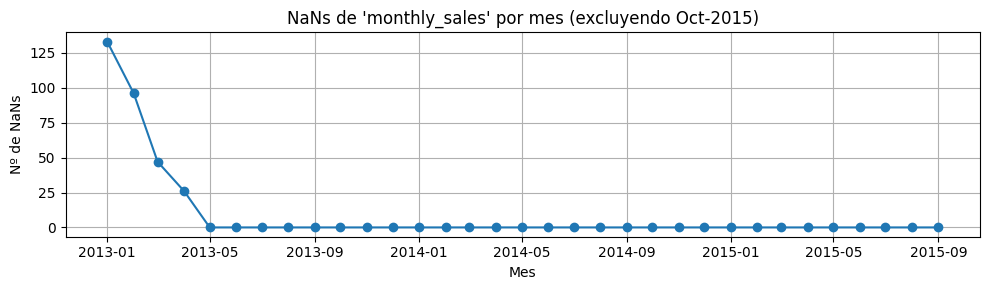

🟢 Los NaNs de ventas se concentran al inicio: 2013-01 – 2013-04. A partir de ese tramo, el histórico queda completo.



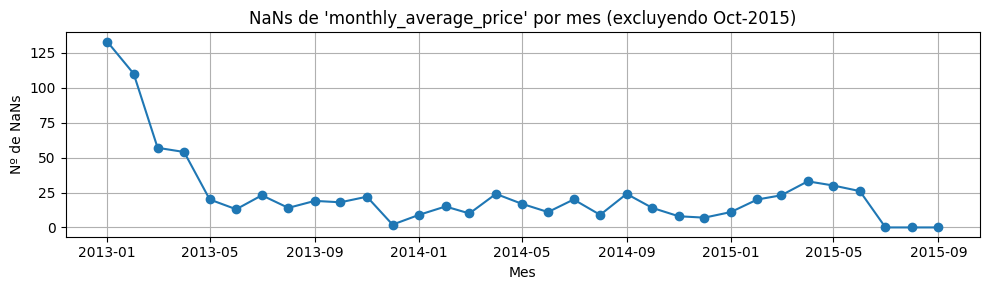

🔵 El patrón de NaNs en precio arranca alto como ventas, pero mantiene huecos esporádicos; imputaremos con FFill/BFill en lags.



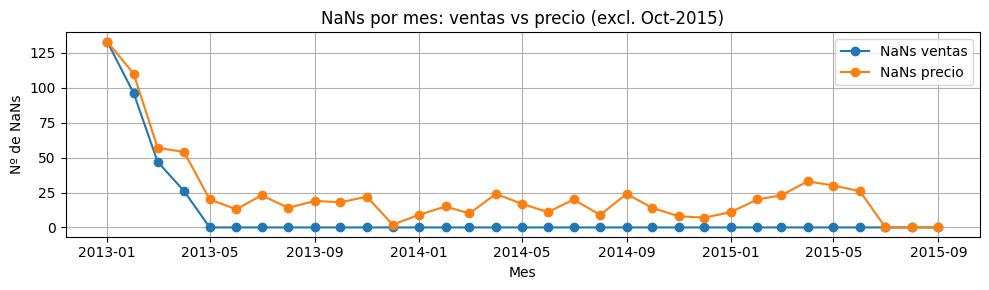

🟣 Ausencias de ventas y precio alineadas al inicio (corr ≈ 0.95); parece efecto de arranque del registro.



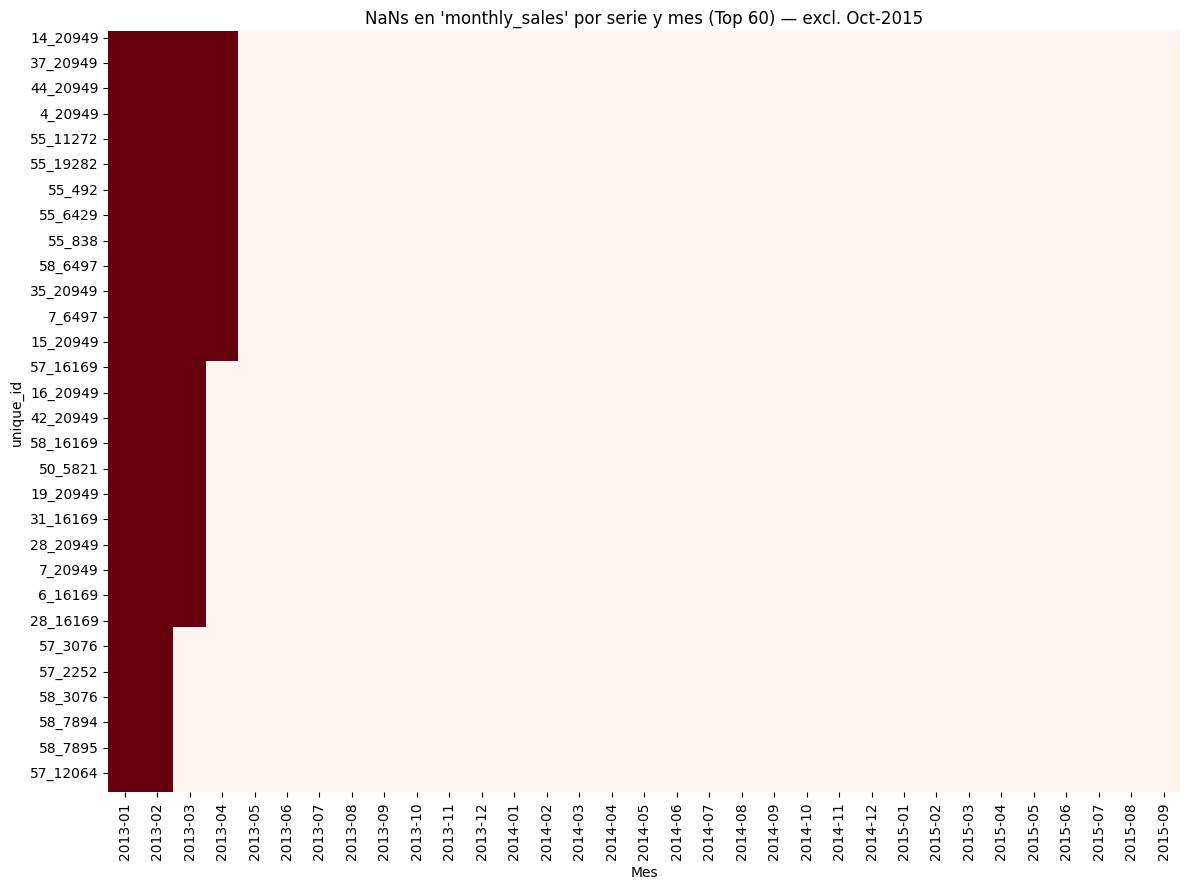

🔴 Los huecos de ventas se concentran en los primeros meses y en pocas series; desde ~2013-05 el histórico queda denso.



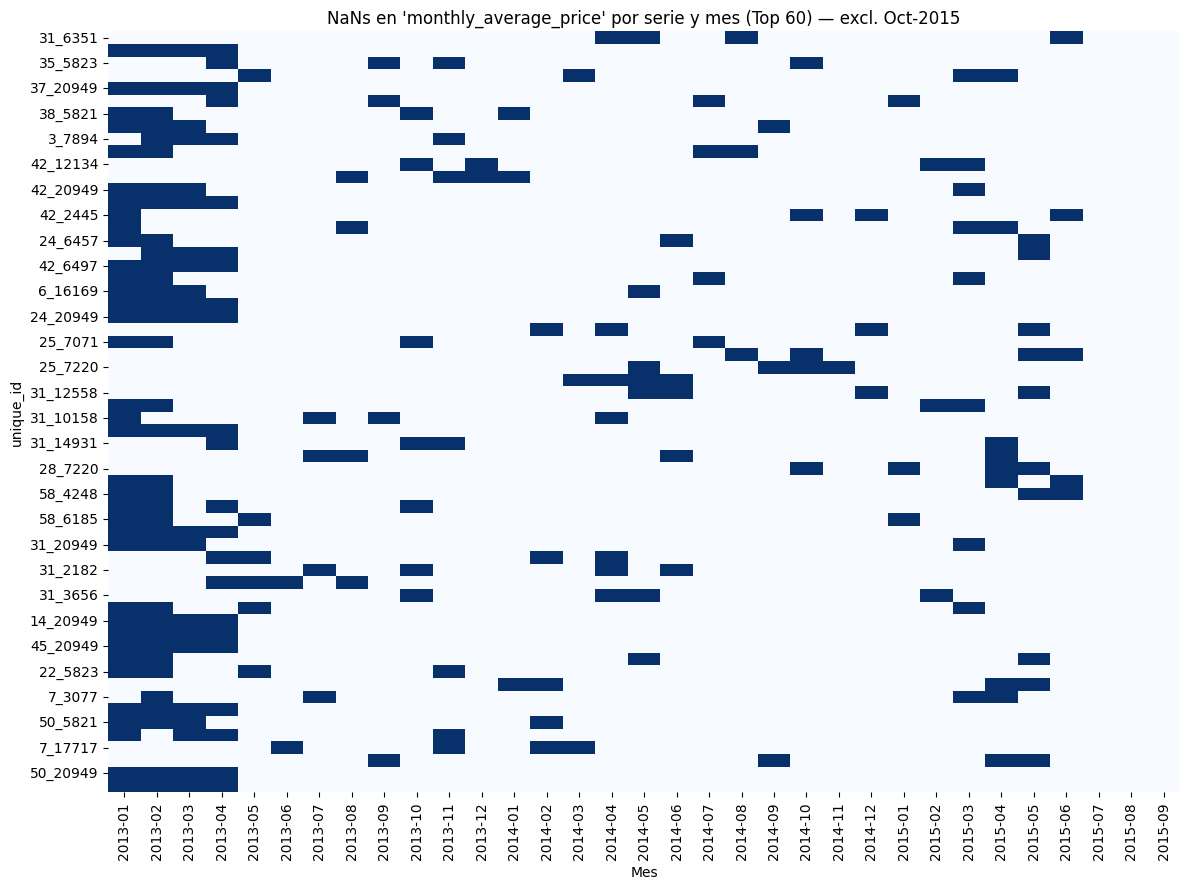

🔵 En precio los huecos son más dispersos: imputación local por serie (FFill/BFill) en lags.


--- Resumen para Interpretación ---
- Series totales: 426
- NaN en y en Oct-2015 (test): 426  (esperado ≈ nº de series)
- NaN en y fuera de Oct-2015: 302  (~2.15% de las filas de entrenamiento)
- ¿Hay NaNs en Sep-2015?: NO

--- Observaciones ---
* Los NaNs de y fuera de Oct-2015 se concentran en ['2013-01', '2013-02', '2013-03', '2013-04']
* La serie con más NaNs de y (fuera de Oct) es: 55_15077 (ver heatmap).
* 'price' tiene huecos puntuales: usaremos SOLO lags de price imputados (FFill/BFill) para evitar leakage.


In [199]:
# -- Helpers
def comentar(texto, icono="💬"):
    print(f"{icono} {texto}\n")

def describe_rango_nan_inicial(serie_nan_by_month):
    """serie_nan_by_month: Series index Period[M], values=int (NaNs por mes excl. Oct)
       Devuelve 'YYYY-MM – YYYY-MM' para el primer bloque contiguo con NaNs>0; None si no hay."""
    s = serie_nan_by_month.copy().sort_index()
    if s.sum() == 0:
        return None
    idx = s.index
    vals = (s > 0).astype(int).values
    start, end = None, None
    for i, flag in enumerate(vals):
        if start is None:
            if flag == 1:
                start = i
        else:
            if flag == 0:
                end = i - 1
                break
    if start is not None and end is None:
        end = len(vals) - 1
    if start is None:
        return None
    return f"{idx[start]} – {idx[end]}"

def nans_por_mes(df, col, mask_excluir=None, periodo='M'):
    _df = df.copy()
    _df['__per'] = _df['date'].dt.to_period(periodo)
    if mask_excluir is None:
        g = _df.groupby('__per')[col].apply(lambda s: s.isna().sum())
    else:
        g = _df.loc[~mask_excluir].groupby('__per')[col].apply(lambda s: s.isna().sum())
    return g.astype(int).sort_index()

def plot_linea_nan(series_period, titulo):
    import matplotlib.pyplot as plt
    if series_period.sum() == 0:
        print("Sin NaNs: se omite gráfico.")
        return
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(series_period.index.to_timestamp(), series_period.values, marker='o')
    ax.set_title(titulo); ax.set_xlabel("Mes"); ax.set_ylabel("Nº de NaNs"); ax.grid(True)
    plt.tight_layout(); plt.show()

# A) df0: columnas requeridas
required_cols = {'date','unique_id','city_id','shop_id',
                 'item_category_id','item_id','monthly_average_price','monthly_sales'}
missing = required_cols - set(df0.columns)
assert not missing, f"Faltan columnas requeridas: {missing}"

# B) df1 tipado + orden temporal
df1 = df0.copy()
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(['unique_id','date'], kind='stable')

# Nombres de columnas clave
y_col = 'monthly_sales'
p_col = 'monthly_average_price'

# C) Pre-cómputos comunes ----
df1['yyyymm'] = df1['date'].dt.to_period('M')
mask_oct = df1['yyyymm'] == pd.Period('2015-10')
mask_sep = df1['yyyymm'] == pd.Period('2015-09')

# D) Cobertura temporal por serie ----
per_serie = (df1
    .groupby('unique_id')
    .agg(
        n_rows=('date','size'),
        first_date=('date','min'),
        last_date=('date','max'),
        n_nan_sales=(y_col, lambda s: s.isna().sum()),
        n_nan_price=(p_col, lambda s: s.isna().sum()),
        zero_share=(y_col, lambda s: (s.fillna(0)==0).mean())
    )
    .reset_index()
)
try:
    display(per_serie.head())
except NameError:
    print(per_serie.head().to_string(index=False))

# E) NaNs de ventas: ¿están en Oct-2015? ----
n_oct_nans = df1.loc[mask_oct, y_col].isna().sum()
n_non_oct_nans = df1.loc[~mask_oct, y_col].isna().sum()
print(f"NaN de ventas en Oct-2015: {n_oct_nans}")
print(f"NaN de ventas FUERA de Oct-2015: {n_non_oct_nans}")

# F) ¿Tenemos Sep-2015 para validación?
has_sep = (df1['date'].dt.to_period('M') == pd.Period('2015-09')).any()
print("¿Existe Sep-2015 en el dataset?:", bool(has_sep))

# G) Series que NO llegan a Sep-2015
last_by_id = df1.groupby('unique_id')['date'].max().dt.to_period('M')
ids_missing_sep = last_by_id[last_by_id < pd.Period('2015-09')].index.tolist()
print("Series que NO alcanzan Sep-2015:", len(ids_missing_sep))

# H) NaNs en Sep-2015
nan_sep = df1.loc[mask_sep, y_col].isna().sum()
print("\nNaN en y durante Sep-2015:", nan_sep)
if nan_sep > 0:
    bad_ids = df1.loc[mask_sep & df1[y_col].isna(), 'unique_id'].unique()
    print("Series con y NaN en Sep-2015:", len(bad_ids))
    print("Ejemplos:", list(bad_ids)[:10], "...")

# I) Distribución de NaNs (tablas + gráficos)
nan_by_month = nans_por_mes(df1, y_col, mask_excluir=mask_oct)
nan_by_id = (df1.loc[~mask_oct]
               .groupby('unique_id')[y_col]
               .apply(lambda s: s.isna().sum())
               .sort_values(ascending=False))

print("\nNaNs de y por mes (excluyendo Oct-2015):")
try:
    display(nan_by_month)
except NameError:
    print(nan_by_month)

print("\nTop series con más NaNs de y (fuera de Oct-2015):")
try:
    display(nan_by_id.head(10))
except NameError:
    print(nan_by_id.head(10))

# I.Viz1a) Ventas
plot_linea_nan(nan_by_month, "NaNs de 'monthly_sales' por mes (excluyendo Oct-2015)")
rango_ini = describe_rango_nan_inicial(nan_by_month)
if rango_ini is None:
    comentar("No hay NaNs de ventas fuera de Oct-2015.", "🟢")
else:
    comentar(f"Los NaNs de ventas se concentran al inicio: {rango_ini}. "
             "A partir de ese tramo, el histórico queda completo.", "🟢")

# I.Viz1b) Precio
nan_price_by_month = nans_por_mes(df1, p_col, mask_excluir=mask_oct)
plot_linea_nan(nan_price_by_month, "NaNs de 'monthly_average_price' por mes (excluyendo Oct-2015)")
if nan_price_by_month.sum() > 0:
    comentar("El patrón de NaNs en precio arranca alto como ventas, "
             "pero mantiene huecos esporádicos; imputaremos con FFill/BFill en lags.", "🔵")

# I.Viz1c) Comparativa
both = (pd.concat({'sales_nan': nan_by_month,
                   'price_nan': nan_price_by_month}, axis=1)
          .fillna(0)
          .astype(int))
if both.values.sum() > 0:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(both.index.to_timestamp(), both['sales_nan'], marker='o', label='NaNs ventas')
    ax.plot(both.index.to_timestamp(), both['price_nan'], marker='o', label='NaNs precio')
    ax.set_title("NaNs por mes: ventas vs precio (excl. Oct-2015)")
    ax.set_xlabel("Mes"); ax.set_ylabel("Nº de NaNs")
    ax.grid(True); ax.legend(); plt.tight_layout(); plt.show()
    corr_nan = both['sales_nan'].corr(both['price_nan'])
    comentar(f"Ausencias de ventas y precio alineadas al inicio (corr ≈ {corr_nan:.2f});"
             " parece efecto de arranque del registro.", "🟣")
else:
    print("No hay NaNs suficientes para comparar ventas vs precio.")

# I.Viz2a) Heatmap de NaNs por serie y mes (ventas)
import seaborn as sns
tmp = (df1.loc[~mask_oct]
         .assign(is_nan=lambda x: x[y_col].isna().astype(int)))
mat = (tmp.pivot_table(index='unique_id', columns='yyyymm',
                       values='is_nan', aggfunc='max', fill_value=0)
          .sort_index(axis=1))
mat_any = mat.loc[mat.sum(axis=1) > 0]
if not mat_any.empty:
    TOP_N = 60
    mat_top = (mat_any.assign(total_nan=mat_any.sum(axis=1))
                        .sort_values('total_nan', ascending=False)
                        .drop(columns='total_nan')
                        .head(TOP_N))
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, max(6, TOP_N*0.15)))
    sns.heatmap(mat_top, cmap="Reds", cbar=False)
    plt.title(f"NaNs en '{y_col}' por serie y mes (Top {TOP_N}) — excl. Oct-2015")
    plt.xlabel("Mes"); plt.ylabel("unique_id"); plt.tight_layout(); plt.show()
    comentar("Los huecos de ventas se concentran en los primeros meses y en pocas series; desde ~2013-05 el histórico queda denso.", "🔴")
else:
    print("Sin series con NaNs de ventas fuera de Oct-2015: se omite heatmap.")

# I.Viz2b) Heatmap de NaNs por serie y mes (precio)
tmp_p = (df1.loc[~mask_oct]
           .assign(is_nan=lambda x: x[p_col].isna().astype(int)))
mat_p = (tmp_p.pivot_table(index='unique_id', columns='yyyymm',
                           values='is_nan', aggfunc='max', fill_value=0)
            .sort_index(axis=1))
mat_p_any = mat_p.loc[mat_p.sum(axis=1) > 0]
if not mat_p_any.empty:
    TOP_N = 60
    mat_p_top = (mat_p_any.assign(total_nan=mat_p_any.sum(axis=1))
                           .sort_values('total_nan', ascending=False)
                           .drop(columns='total_nan')
                           .head(TOP_N))
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, max(6, TOP_N*0.15)))
    sns.heatmap(mat_p_top, cmap="Blues", cbar=False)
    plt.title(f"NaNs en '{p_col}' por serie y mes (Top {TOP_N}) — excl. Oct-2015")
    plt.xlabel("Mes"); plt.ylabel("unique_id"); plt.tight_layout(); plt.show()
    comentar("En precio los huecos son más dispersos: imputación local por serie (FFill/BFill) en lags.", "🔵")

# J) Mini resumen + Observaciones guiadas
n_series = df1['unique_id'].nunique()
total_rows = len(df1)
rows_oct = mask_oct.sum()
rows_non_oct = total_rows - rows_oct
pct_non_oct = 100 * n_non_oct_nans / max(rows_non_oct, 1)

print("\n--- Resumen para Interpretación ---")
print(f"- Series totales: {n_series}")
print(f"- NaN en y en Oct-2015 (test): {n_oct_nans}  (esperado ≈ nº de series)")
print(f"- NaN en y fuera de Oct-2015: {n_non_oct_nans}  (~{pct_non_oct:.2f}% de las filas de entrenamiento)")
print(f"- ¿Hay NaNs en Sep-2015?: {'SÍ' if nan_sep>0 else 'NO'}")

print("\n--- Observaciones ---")
if nan_by_month.sum() > 0:
    meses_con_nan = list(nan_by_month[nan_by_month>0].index.astype(str))
    print(f"* Los NaNs de y fuera de Oct-2015 se concentran en {meses_con_nan[:6]}{' ...' if len(meses_con_nan)>6 else ''}")
else:
    print("* No hay NaNs de y fuera de Oct-2015.")
if mat_any.empty:
    print("* No hay series con huecos (NaNs) en y fuera de Oct-2015.")
else:
    top_uid = nan_by_id.index[0]
    print(f"* La serie con más NaNs de y (fuera de Oct) es: {top_uid} (ver heatmap).")
if nan_price_by_month.sum() > 0:
    print("* 'price' tiene huecos puntuales: usaremos SOLO lags de price imputados (FFill/BFill) para evitar leakage.")
else:
    print("* No hay NaNs relevantes en 'price' fuera de Oct-2015.")


🔎 Interpretación – Sección 1.5.1 (Comprobaciones temporales clave)

1. Cobertura temporal por serie
- Todas las series tienen 34 filas (Ene-2013 → Oct-2015) - Ideal👍: no hay series cortas ni “series que no alcanzan Sep-2015”.
- Implica que el horizon de predicción es exactamente 1 mes (Oct-2015) para todas las series.
2. NaNs en monthly_sales (target)
- Oct-2015: 426 NaNs → coincide con el nº de unique_id (14484 filas / 34 meses = 426 series) - ✔️ Esto confirma que Oct-2015 es el test (lo que hay que predecir) para todas las series.
- Fuera de Oct-2015: 302 NaNs → es ~2.1% de las observaciones de entrenamiento (302 / (14484-426) ≈ 2.15%) - Es poco y no debería comprometer el tamaño de train.

💡 Decisión práctica (recomendada):
- No imputar 'y' en train. Simplemente excluir esas filas con 'y' NaN siempre que no sean Sep-2015. Así evitamos introducir sesgos artificiales (convertir “desconocido” en cero puede falsear la distribución).
- Verificar que Sep-2015 no tenga NaNs en 'y'. Si existiera alguno, esa serie quedaría sin validación; ahi puedemos: (a) excluir solo esa observación de validación, o (b) excluir temporalmente esa serie del cálculo de métricas de validación.

3. NaNs en monthly_average_price (exógena)
- Es normal ver algún NaN (n_nan_price=1–2) - No usar el price contemporáneo en Oct-2015 para predecir (no se conocerá en producción).
- Plan: imputar solo en lags (FFill/BFill por serie) y construir features con price_lag{k} (nunca price_t para Oct-2015) - Evita leakage.
4. Zeros y estructura de la demanda
- zero_share bajo en nuestras muestras (3–6%), pero a revisar distribución global. Series con muchos ceros o alta varianza pedirán robustez (clipping por IQR, pérdidas tipo MAE, etc.). Lo afinamos en la parte de feature engineering y modelos. ***

📌 Conclusión operativa:

- Dataset bien formado (34 pasos por serie, horizonte claro).
- Estrategia segura:
    - Quitar filas de train con y NaN (excepto Oct-2015, que se queda como test).
    - Imputar solo lags de price (no el contemporáneo) y generar lags/rollings de 'y' cuidando ventanas.
    - Confirmar que Sep-2015 está completo para validar con RMSE sin contaminación temporal.
    - Documentar si hay alguna serie sin Sep o con y NaN en Sep y cómo se trata en validación.

### 1.5.2 Visualización de ejemplos


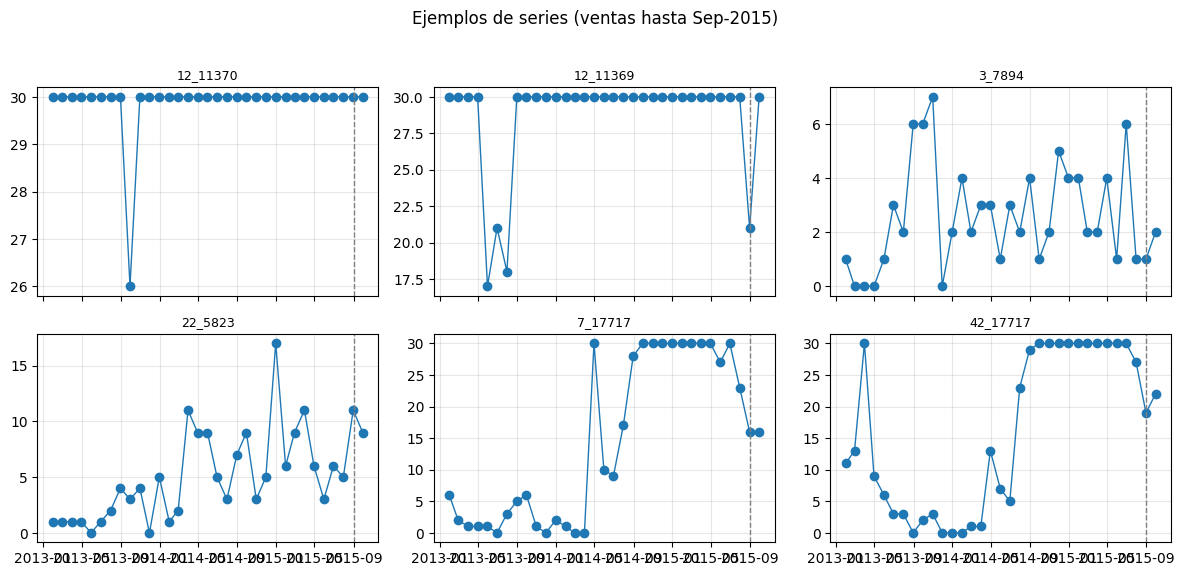

👀 Hemos seleccionado 6 series representativas: más vendidas, con muchos ceros y con alta variabilidad.

Cada subplot es una serie de ventas (monthly_sales) para un unique_id, desde ene-2013 hasta sep-2015 (la línea discontinua marca el fin del histórico: sep-2015).


In [200]:
# -- Helpers reutilizables (sin pisar lo anterior)
def _serie_uid(df, uid):
    s = (df.loc[df['unique_id']==uid, ['date', y_col]]
            .sort_values('date')
            .set_index('date')[y_col])
    return s

def _safe_visual_series_until_sep(s):
    """Devuelve la serie hasta 2015-09 con imputación ligera SOLO para ver (no modelar)."""
    s_cut = s.loc[:'2015-09']
    # imputación solo para trazar (no guardar en df):
    return s_cut.interpolate(limit_direction='both')

def plot_series_grid(df, uids, ncols=3, title="Ejemplos de series (hasta Sep-2015)"):
    n = len(uids)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 2.8*nrows), sharex=True)
    axes = np.atleast_1d(axes).ravel()
    for ax, uid in zip(axes, uids):
        s = _serie_uid(df, uid)
        s_vis = _safe_visual_series_until_sep(s)
        ax.plot(s_vis.index, s_vis.values, marker='o', linewidth=1)
        ax.axvline(pd.Timestamp('2015-09-01'), color='gray', linestyle='--', linewidth=1)
        ax.set_title(str(uid), fontsize=9)
        ax.grid(True, alpha=0.3)
    for ax in axes[n:]:
        ax.axis('off')
    fig.suptitle(title, y=1.02, fontsize=12)
    plt.tight_layout()
    plt.show()

# -- Selección de ejemplos "con sentido" usando per_serie ya calculado
# 1️⃣ Muy vendidas (top total ventas)
total_by_id = (df1.groupby('unique_id')[y_col].sum().sort_values(ascending=False))
top_sales = list(total_by_id.head(2).index)

# 2️⃣ Muchas ceros (si zero_share existe en per_serie)
if 'zero_share' in per_serie.columns:
    top_zero = list(per_serie.sort_values('zero_share', ascending=False)
                              .head(2)['unique_id'])
else:
    # Fallback rápido: estimar cero_share al vuelo
    zero_share_tmp = (df1.assign(is_zero=df1[y_col].fillna(0).eq(0))
                         .groupby('unique_id')['is_zero'].mean()
                         .sort_values(ascending=False))
    top_zero = list(zero_share_tmp.head(2).index)

# 3️⃣ Alta variabilidad (std grande hasta Sep-2015)
std_by_id = (df1.loc[df1['date']<= '2015-09-30']
               .groupby('unique_id')[y_col].std()
               .sort_values(ascending=False))
top_var = list(std_by_id.head(2).index)

# Combinar y quitar duplicados
ejemplos = []
for lst in [top_sales, top_zero, top_var]:
    for u in lst:
        if u not in ejemplos:
            ejemplos.append(u)
ejemplos = ejemplos[:6]  # 6 gráficas

# Traza
plot_series_grid(df1, ejemplos, ncols=3, title="Ejemplos de series (ventas hasta Sep-2015)")
comentar(f"Hemos seleccionado {len(ejemplos)} series representativas: más vendidas, con muchos ceros y con alta variabilidad.", "👀")

plt.show
print("Cada subplot es una serie de ventas (monthly_sales) para un unique_id, desde ene-2013 hasta sep-2015 (la línea discontinua marca el fin del histórico: sep-2015).")


📝 Notas:

🔹 1. Series 12_11370 y 12_11369
- Casi planas en torno a 30 → ventas muy estables.
- Un único bajón puntual (outlier aislado).
👉 Implica: comportamiento predecible → lags cortos (lag_1, lag_2) y rolling medias suaves (rolling_3) serán muy útiles.
👉 También conviene tratar el outlier (clip IQR o winsorizar).

🔹 2. Serie 3_7894
- Fluctuaciones pequeñas (entre 0–6), sin patrón claro.
- Parece ruido aleatorio o baja demanda (muchos ceros).
👉 Aquí los modelos clásicos (ARIMA, naive, LightGBM) pueden tener dificultad: será importante agregar información de grupo o cluster similar.

🔹 3. Serie 22_5823
- Tendencia creciente moderada, con ruido y picos.
👉 Ideal para probar features de tendencia: rolling_mean_3, rolling_mean_6, diferencia y_t - y_{t-1}.
👉 A partir de 2014 empieza a “moverse” más → posible producto con demanda creciente.

🔹 4. Serie 7_17717
- Inicio con ceros, luego cambio de régimen brusco y estabilidad alta.
👉 Hay un cambio estructural: lo mejor es que el modelo capture “niveles” previos.
👉 Añadir features como “mes”, “año” o “tiempo desde primera venta” puede ayudar.

🔹 5. Serie 42_17717
- Forma de U invertida → cae, luego sube y se mantiene.
- Clarísima tendencia no lineal (ideal para rolling largos o modelos no lineales tipo árboles).
👉 Podría haber un patrón estacional leve (~12 meses).